#In-Context Learning for Clinical Relation Extraction using LLaMA 3

## Task: Relation Extraction

Its a subtask to information extraction, like named entity recognition. Its important we have a lot of data rappresented in text sequence of word what we want it is extract value from the text insight value specific information or semantic from text...

**Relation extraction** (RE) is the task that involves **identifying and categorizing semantic relations between entities within a text**. As an advanced information extraction technique, RE aims to transform unstructured textual data into structured knowledge, facilitating the automatic construction of knowledge bases, enhancing information retrieval systems, and supporting various downstream NLP applications.

Formally, given a corpus $C$ comprising a set of documents
$ \{D_1, D_2, ... , D_n\}$, the objective of relation extraction is to identify entities $ \{e_1, e_2,...,e_m \}$ within each document $D_i$ and determine the relations $R$ between these entities. Each relations $r \in R$ can be represented as a tuple $(e_i,e_j,t)$ where $e_i$ and $e_j$ are entities and $t$ is the type of the relation.

Using a typical approach, the process of relation extraction can be delineated through the following steps:

1.  **Named Entity Recognition** (NER): Identify and classify entities $ \{e_1,e_2,...,e_m \} $ within each document $D_i$. This can be formally represented as a function $NER:D_i → \{e_1,e_2,...,e_m\}$.

2.  **Relation Detection and Classification**: For every possible pair of entities $(e_i,e_j) \in \{e_1,e_2,...,e_m \}$ and with $i \neq j$, determine the existence and type of relation $t$ between them. Note that for the majority of the pairs $t$ is not exists. This can be represented as a function $RE:(e_i,e_j) → t$.

First relevate entities in the text, we first use the BIO-tagging in past exercise we map this task in a text generation way...its not only about NERC when you identify entities you want to link them knowledge in triples...past method i want a model that solve named entity recognition , leveraging the BIO tagging i train the model so i am able to tag relevant entities then i need another model given a sentence just identify entity able to estabilish link between entities this was the standard approach....in this lab we want to use LLM to extract the relation from text so simply we have sentence and we want to generate text according to ability of LLM generate other text sequence to sequence task...

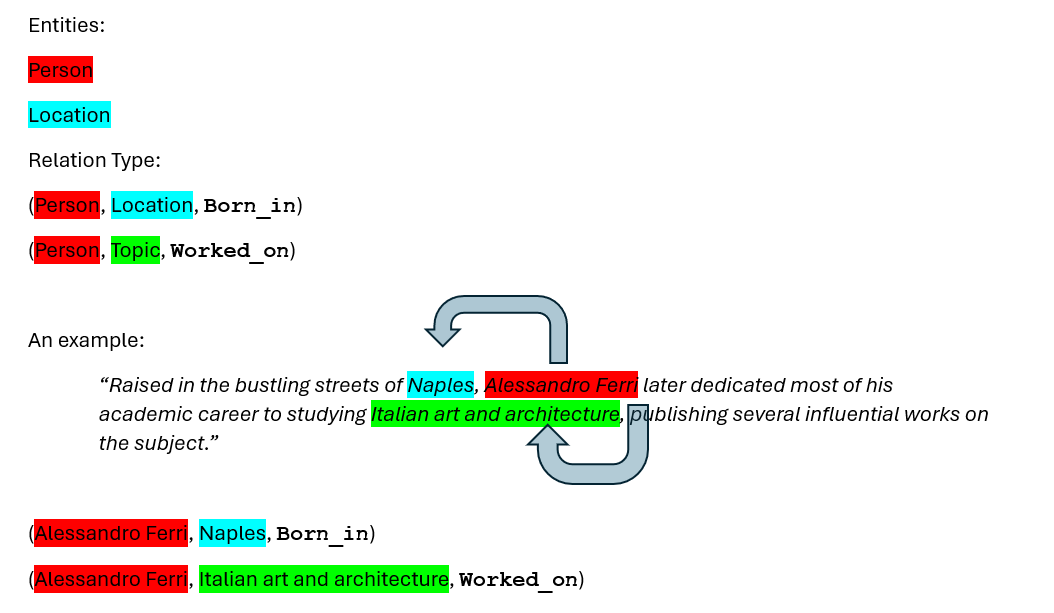

### Relation Extraction in the medical domain: CLinkaRT EVALITA challenge

We have several clinic text,reports and what we want is to identify two types of entities:

1. clinical test entities
2. another type of entities measure of a value we want to link the clinical entities with the right values for example temperature with 30 degrees...blood pressure with high and relate them...


During the last edition of the [EVALITA challenge](https://www.evalita.it/campaigns/evalita-2023/), an interesting task was introduced: [*CLinkaRT, relation extraction in the medical domain*](
https://e3c.fbk.eu/clinkart).

In this task the only two possible types of entities are **Clinical test** and **Measure**

**Clinical test** is the name of the laboratory test.

**Measure** is result that provides interesting information on the patient's status.

The only type of relation is **Pertains_to**

such that a relations $r \in R$ is the tuple $ (Clinical \;test, Measure, Pertains\_to) $

The task is to find all the relations within a medical report $D_i$.

In the following images the clinical test entity is highlighted in blue and its result in red.

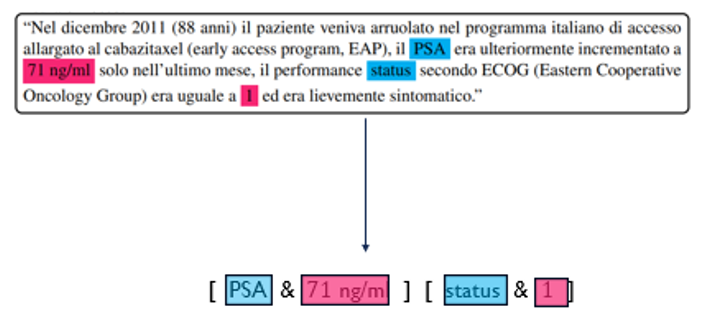

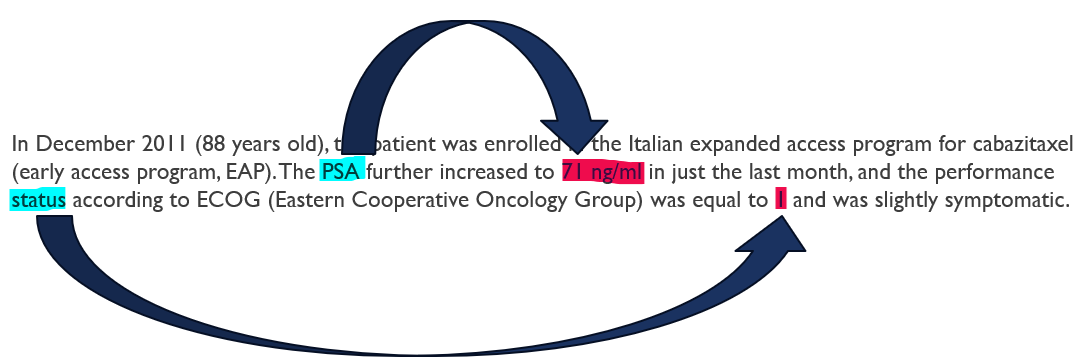

In this task, a **Clinical test** type entity can be composed exclusively of one word, while a **Measure** type entity can be composed of multiple words or numbers.

The **Pertains_to** relation type can connect:


*   A **Clinical test** to one **Measure**
*   A **Clinical test** to many **Measure**s
*   A **Measure** to many Clinical **test**s



During this lesson, **RE** can thus be viewed **as a specialized form of text generation**. Given an unstructured text as input context, exploiting the capabilities of a Large Language decoder Model, the goal is to autoregressively generate a sequence of symbols that most likely aligns with the provided context. Here, the most coherent sequence is defined as the one that best represents the relations present in the text, both in form and meaning.

A transformer based decoder only model (for example LLaMa), this model is based on 4 pilars:

1. This model are builded on very huge number of parameters, the big is the model better is the results...8 miliardi di parameteri, 14 miliardi 17 miliardi ect...


2. This model are based on the attention mechanism.

3. The size of the dataset where the model was trained...all the internet inside

4. Task in which train the model, when you have BERT they invent two artificial task language masking a sentence with empty word or next sentence prediction....the same idea is apply to decoder only such as Llama the task is next token prediction...given a sentence the model is asked to produce the next word...(cross entropy to train). This is done autoregressively we start yesterday i went to the ---> concert then in an autoregressive way the model append the just generated word in the previous context to generate the next word again...then an end to string the token to stop. Its just like a classification problem, you have an input and an output which is one class imagine here i have an input which is a sequence i have to choose the most probabily word (class) every time ouptut one word in a set of 30000 (word-pieces) vocabulary word classes. ---> softmax in a 300000 space.



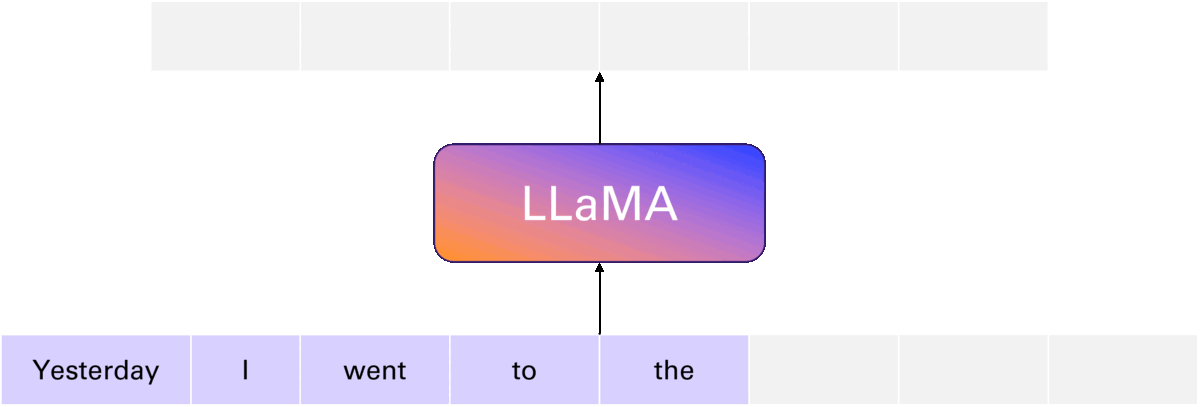

We want to use this text generation ability to solve a problem

## Exploring *In-Context Learning* methods for CLinkaRT challenge



A Large Language Model will be used to explore its potential for solving the task without the need for additional training or fine-tuning on data examples (*In-Context Learning*).

* The model is pre-trained on a massive corpus of text data, learning to predict the next word in a sentence. This helps the model understand context, grammar, facts, and various language nuances.

* During this phase, the model implicitly learns about various topics and tasks, even if not explicitly labeled or categorized.

The idea is to exploit the language modeling abilities of the models coupled with some instances that will function as demonstrations of how to solve the task. These instances will provide information about the task and the desired formalism of the output.

More details about this stuff -> [*Language Models are Few-Shot Learners*](https://arxiv.org/abs/2005.14165)


# In context Learning methods:
We fine tune or train the model in last lesson, we train the model to solve the task. In this case our assumption is: the model are just so powerful we can use this model as is to solve the movel from this paper : Language Models are Few-Shot Learners (GPT-2 / GPT-3). They introduce the concepts of prompt engineering and context learning, if i write a very good prompt just when you use chatgpt you maximize the probability the model generate the sequence to solve your task, I interrogate the model in order to solve my problem....3 different type of in context learning and prompt engineer: we dont USE FINE TUNING:

-Zero-shot: is the model predict an answer given only a natural language description same way to use chatgpt, translate english to french then you put the input and what we expect the model is able to generate as most probably words...only on instruction and then the input the model continue generating....

-One shot: which again you see that you can write the task this time in order to optimize the probability the model generates what you want you can put an example for example
sea otter ---> loutre de mer then you put your input...

-Few shot: same concept of one shot but in this case several example that you exposes to several example its not about train now we are focus on the fact there is no gradient calculation it is about write some example to guide the model on a sequence that is your expected solution...

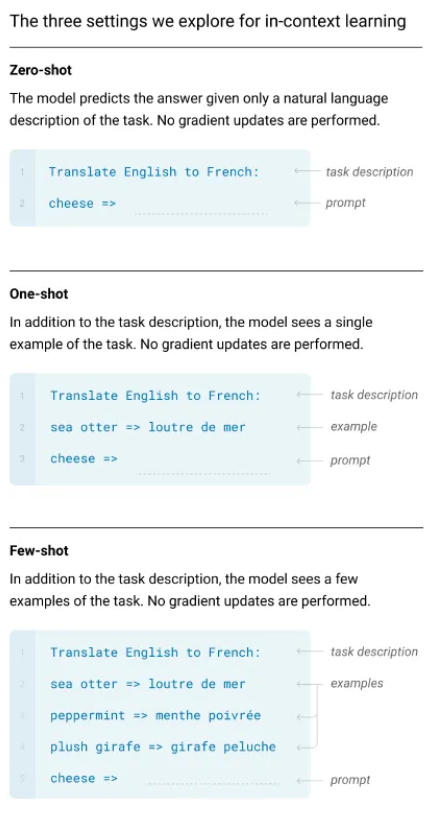

### Requirements

In [ ]:
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl==0.15.2 triton cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf "datasets>=3.4.1" huggingface_hub hf_transfer
!pip install transformers==4.51.3
!pip install --no-deps unsloth
!pip install sentence_transformers

In [ ]:
!pip install bitsandbytes accelerate xformers==0.0.29.post3 peft trl==0.15.2 triton cut_cross_entropy unsloth_zoo sentencepiece protobuf "datasets>=3.4.1" huggingface_hub hf_transfer transformers==4.51.3 sentence_transformers unsloth
import torch
import numpy as np
from unsloth import FastLanguageModel #reduce the memory used...
from sentence_transformers import SentenceTransformer, util
import re
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 140.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using the MPS device for MAC")
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset

For the purpose of the lesson the medical documents have already been divided into sentences and the reports have been explicitly written as labels.

Therefore the version of this dataset for the lesson is composed as follows:

In [ ]:
#Put the datasets on your Google Drive account and then change the path to your Google Drive to use them
file_path_train = '/content/drive/My Drive/df_train.csv' #the train not to train the model just to pick up the example that we use during the one shot-few shot example
file_path_test = '/content/drive/My Drive/df_test.csv'



pd.set_option('display.max_colwidth', None)

pd.set_option('display.width', 1000)

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

df_train.sample(10)


,Sentences,Targets
544,"All’EGA: acidosi mista, metabolica con acidemia ad AG normale ipercloremica e respiratoria",[]
227,Oliguria,[]
661,Per il riscontro di alti livelli di calprotectina fecale (277 mg/Kg) il piccolo veniva sottoposto a screening degli asCa e colonscopia,[ calprotectina & 277 mg/Kg ]
334,"Tuttavia era costante il riscontro di malattia da reflusso gastro-esofageo secondario, ernia iatale tipo hill 2 e microgastria, anche se quest’ultima in lieve miglioramento: dopo 3 anni dall’intervento la distanza tra cardias e piloro era di 5 cm",[ distanza & 5 cm ]
912,"Liberazione completa della massa, che è estratta in bag",[]
131,Gli anticorpi anti recettore Ach sono risultati positivi,[ anticorpi & positivi ]
433,Leonardo aveva iniziato pertanto terapia sostitutiva con immunoglobuline per via endovenosa,[]
391,Il Sig,[]
452,"In terapia domiciliare con metformina e sulfaniluree, in scadente compenso glicometabolico",[]
841,"L’esame istologico dimostrava mucosa gastrica atrofica con flogosi cronica, marcato edema ed incremento del connettivo del corion, focale metaplasia intestinale, il tutto sovrastante un tessuto fibromuscolare",[]


In [ ]:
#Length of datasets
print(len(df_train))
print(len(df_test))

918
162


### Decoder only model: Pre-Trained Base Llama 3



> https://ai.meta.com/blog/meta-llama-3/

> https://huggingface.co/unsloth/Meta-Llama-3.1-8B-Instruct












In [ ]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("unsloth/Meta-Llama-3.1-8B")

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

#### Defining prompts

When given a prompt or query, the model uses its pre-trained knowledge to generate a response.

This response is generated text by predicting the most probable next word based on the given prompt and the context derived from its training data. This contextual understanding allows it to handle queries about unfamiliar tasks or topics.

We will use the In-Context Learning paradigm in three ways:




*   **0-Shot**: no examples as demonstration will be given, we want to test model ability to solve the task without any external hints
*   **One-Shot**: only one example will be given as demonstration, it will provide information about the output formalism and some info about the task.
*   **Few-Shot**: few examples will be given as demonstrations, it will provide information both about the output formalism and plenty info about the task.





**0-SHOT**

In [ ]:
def zero_shot_prompt(input_ctx): #input is a sentence of the test data

  #the input_ctx is a variable containing a sentence of the test data

  #this is the task description of the model
  prompt = f"Estrarre tutte le relazioni fra test clinici e relative misurazioni da una frase di un referto medico.\n\n" \
           f"Frase di un referto medico:\n{input_ctx}\n\n" \
           f"Tutte le relazioni fra test clinici e relative misurazioni nella frase sono:\n"
          #with f string you can put a varianle inside the string

  # In english
  # prompt = f"Extract all relationships between clinical tests and their corresponding measurements from a sentence in a medical report.\n\n"
  #          f"Medical report sentence:\n{input_ctx}\n\n" \
  #          f"All relations between clinical tests and related measurements in the sentence are:\n"

  return prompt

**Model for sentence embedding: *SentenceTransformer all-MiniLM-L6-v2***

It is useful for One and Few-Shot Learning to retrieve and inject the most similar $k$ demonstrations relative to the input sentence into the prompt.



> https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2



In [ ]:
sim_model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
#embedding all sentences of the training
sentences = df_train['Sentences'].to_list()
embedded_sentences = sim_model.encode(sentences, convert_to_tensor=True)


**ONE-SHOT**

I need an example i want to choose this example : i encode all my train example in vectors second part is to use encode my input i use semantic distances between train set example and my input i can choose the example to maximize the cosine similarity

Is encoded vector of your input then use cosine similarity you can choose also example randomly...

In [ ]:
def one_shot_prompt(input_ctx,X_train, y_train, embedded_sentences):


#Encode the input sentence
   embedded = sim_model.encode(input_ctx, convert_to_tensor=True)


#Compute cosine-similarities between test set input sentence and the sentences in the training set
   cosine_scores = util.cos_sim(embedded, embedded_sentences)


#extract the k (0) similar sentences
   array_values = np.array(cosine_scores[0].tolist())
   index = np.argsort(array_values)[-1:]



   # the variable X_train.iloc[index[0]] contains the most similar training set sentence in the respect of the input
   # the variable y_train.iloc[index[0]] contains the sentence gold relations
   prompt =f"Estrarre tutte le relazioni fra test clinici e relative misurazioni da una frase di un referto medico.\n\n" \
           f"Frase di un referto medico:\n{X_train.iloc[index[0]]}\n\n" \
           f"Relazioni:\n{y_train.iloc[index[0]]}\n\n" \
           f"Frase di un referto medico:\n{input_ctx}\n\n" \
           f"Relazioni:\n"

  #In english:
  #  prompt = f"Extract all relations between clinical tests and related measurements.\n\n" \
  #          f"Medical report sentence:\n{X_train.iloc[index[0]]}\n\n" \
  #          f"Relations:\n{y_train.iloc[index[0]]}\n\n" \
  #          f"Medical report sentence:\n{input_ctx}\n\n" \
  #          f"Relations:\n"

   return prompt

Training set as a pull in which we extract example we need for our one-shot and few-shot strategies...

**FEW-SHOT**

In [ ]:
def few_shot_prompt(input_ctx,X_train, y_train, embedded_sentences):




#Encode the input sentence
   embedded = sim_model.encode(input_ctx, convert_to_tensor=True)


#Compute cosine-similarities between test set input sentence and the sentences in the training set
   cosine_scores = util.cos_sim(embedded, embedded_sentences)


#extract the k similar sentences
   array_values = np.array(cosine_scores[0].tolist())
   index = np.argsort(array_values)[-5:] #5 shot



   # in this case is a 5-shot prompt
   prompt =f"Estrarre tutte le relazioni fra test clinici e relative misurazioni da una frase di un referto medico.\n\n" \
           f"Frase di un referto medico:\n{X_train.iloc[index[0]]}\n\n" \
           f"Relazioni:\n{y_train.iloc[index[0]]}\n\n" \
           f"Frase di un referto medico:\n{X_train.iloc[index[1]]}\n\n" \
           f"Relazioni:\n{y_train.iloc[index[1]]}\n\n" \
           f"Frase di un referto medico:\n{X_train.iloc[index[2]]}\n\n" \
           f"Relazioni:\n{y_train.iloc[index[2]]}\n\n" \
           f"Frase di un referto medico:\n{X_train.iloc[index[3]]}\n\n" \
           f"Relazioni:\n{y_train.iloc[index[3]]}\n\n" \
           f"Frase di un referto medico:\n{X_train.iloc[index[4]]}\n\n" \
           f"Relazioni:\n{y_train.iloc[index[4]]}\n\n" \
           f"Frase di un referto medico:\n{input_ctx}\n\n" \
           f"Relazioni:\n"

    #In english:
    # prompt = f"Extract all relations between clinical tests and related measurements.\n\n" \
    #        f"Medical report sentence:\n{X_train.iloc[index[0]]}\n\n" \
    #        f"Relations:\n{y_train.iloc[index[0]]}\n\n" \
    #        f"Medical report sentence:\n{X_train.iloc[index[1]]}\n\n" \
    #        f"Relations:\n{y_train.iloc[index[1]]}\n\n" \
    #        f"Medical report sentence:\n{X_train.iloc[index[2]]}\n\n" \
    #        f"Relations:\n{y_train.iloc[index[2]]}\n\n" \
    #        f"Medical report sentence:\n{X_train.iloc[index[3]]}\n\n" \
    #        f"Relations:\n{y_train.iloc[index[3]]}\n\n" \
    #        f"Medical report sentence:\n{X_train.iloc[index[4]]}\n\n" \
    #        f"Relations:\n{y_train.iloc[index[4]]}\n\n" \
    #        f"Medical report sentence:\n{input_ctx}\n\n" \
    #        f"Relations:\n"

   return prompt

#### Generation

##### **Prompt tokenization**

Tokenizing text before inputting it into a language model is crucial for transforming raw text into a format that the model can process effectively.

In [ ]:
input_ids_lst_0 = []
input_ids_lst_1 = []
input_ids_lst_few = []

prompt_lst_0 = []
prompt_lst_1 = []
prompt_lst_few = []

for k in range(len(df_test)): #loop over test set

    #input sentence from test set
    input_ctxt = df_test['Sentences'].iloc[k]

    #building different prompts
    prompt_0 = zero_shot_prompt(input_ctxt)
    prompt_1 = one_shot_prompt(input_ctxt,df_train['Sentences'], df_train['Targets'], embedded_sentences)
    prompt_few = few_shot_prompt(input_ctxt,df_train['Sentences'], df_train['Targets'], embedded_sentences)

    prompt_lst_0.append(prompt_0)
    prompt_lst_1.append(prompt_1)
    prompt_lst_few.append(prompt_few)

    #tokenize different prompts
    input_ids_0 = tokenizer(prompt_0, return_tensors="pt")
    input_ids_1 = tokenizer(prompt_1, return_tensors="pt")
    input_ids_few = tokenizer(prompt_few, return_tensors="pt")

    input_ids_lst_0.append(input_ids_0)
    input_ids_lst_1.append(input_ids_1)
    input_ids_lst_few.append(input_ids_few)



In [ ]:
# The uncommented line of code shows us an example of a few shot prompt

#print(prompt_lst_0[0])
#print(prompt_lst_1[0])
print(prompt_lst_few[2])

Estrarre tutte le relazioni fra test clinici e relative misurazioni da una frase di un referto medico.

Frase di un referto medico:
 Al momento della diagnosi i parametri laboratoristico-strumentali erano i seguenti: PSA 127 ng/ml, il Gleason score 8 (4+4), due lesioni ossee evidenti alla scintigrafia ossea e la TC risultava negativa per ripetizioni viscerali

Relazioni:
[ PSA & 127 ng/ml ] [ score & 8 ] [ score & 4+4 ] [ TC & negativa ] [ ripetizioni & negativa ]

Frase di un referto medico:
 All’ingresso apiretico, parametri nella norma, PCR 20 mg/l, leucociti 5.410/mmc, Hb 11,7 g/dl, piastrine 53.000/mmc (come i precedenti), il resto nella norma

Relazioni:
[ parametri & nella norma ] [ PCR & 20 mg/l ] [ leucociti & 5.410/mmc ] [ Hb & 11,7 g/dl ] [ piastrine & 53.000/mmc ]

Frase di un referto medico:
    L'esame obiettivo documentava lieve dispnea, toni cardiaci validi e in successione ritmica, soffio sistolico 2/6 Freeman-Levine puntale, murmure vescicolare fisiologico senza segni

Questo è quello che il modello vede quando lo chiami. Gli esempi sono simili (per esempio parlano di PA pressione arteriosa...retriving the most similar example to evidence could be useful to this final input)

In [ ]:
print(input_ids_lst_few[0]['input_ids'][0])

tensor([128000,     36,  22979,    265,  75257,    514,   1375,  32751,   6816,
          1296,   9400,   3457,    384,   8844,   5906,    324,  32751,   3067,
          5203,  91429,   1891,    653,   2098,  14200,   1812,   4042,    382,
            37,  10857,   1891,    653,   2098,  14200,   1812,   4042,    512,
           362,  34560,  42614,   1208,  80585,  13140,  19678,    653,  41718,
           459,    309,  22129,   4042,  77230,    264,  26077,  31221,    259,
         25471,   1564,     25,    436,  11691,  90368,   1891,  35366,   3611,
         27625,   3067,  12868,   6786,   1891,  17533,    258,  12278,   3180,
           942,     11,    390,   1567,     72,   1891,    436,    532,  13028,
         28071,   1380,   8778,  10426,    304,   9163,   6473,   1891,  59349,
          1992,  12583,    271,   6882,  32751,    512,   1318,    271,     37,
         10857,   1891,    653,   2098,  14200,   1812,   4042,    512,   7695,
         10799,    708,   1772,   8043, 

for each index a word-piece

Max: 1062
Mean: 426.85
Median: 393.5


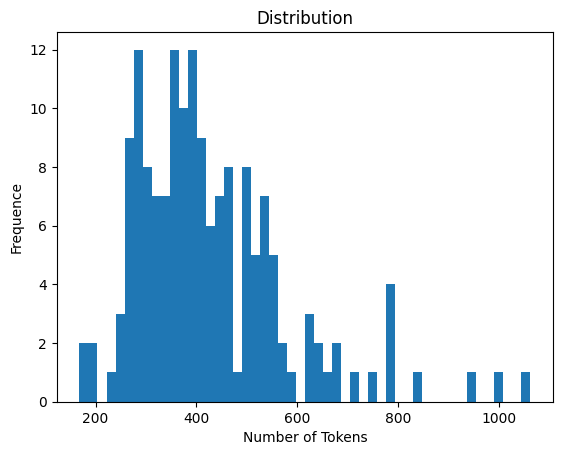

In [ ]:
token_lengths = [len(ids['input_ids'][0]) for ids in input_ids_lst_few]
# Compute statistics
print(f"Max: {max(token_lengths)}")
print(f"Mean: {np.mean(token_lengths):.2f}")
print(f"Median: {np.median(token_lengths)}")

# Distribution
plt.hist(token_lengths, bins=50)
plt.title("Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequence")
plt.show()

In english:

**Extract all relations between clinical tests and related measurements.**

**Medical report sentence:**
 At the time of diagnosis, the laboratory-instrumental parameters were as follows: PSA 127 ng/ml, Gleason score 8 (4+4), two bone lesions evident on bone scintigraphy, and the CT was negative for visceral recurrences.

**Relations:**
[ PSA & 127 ng/ml ] [ score & 8 ] [ score & 4+4 ] [ CT & negative ] [ recurrences & negative ]

**Medical report sentence:**
 Upon admission, afebrile, parameters within normal limits, CRP 20 mg/l, leukocytes 5,410/mmc, Hb 11.7 g/dl, platelets 53,000/mmc (as previously), the rest within normal limits.

**Relations:**
[ parameters & within normal limits ] [ CRP & 20 mg/l ] [ leukocytes & 5,410/mmc ] [ Hb & 11.7 g/dl ] [ platelets & 53,000/mmc ]

**Medical report sentence:**
 The physical examination documented mild dyspnea, valid and rhythmic heart tones, 2/6 Freeman-Levine apical systolic murmur, physiological vesicular murmur without signs of pulmonary congestion or bronchospasm, no dependent edema, abdomen treatable and without tender points; blood pressure was 120/70 mmHg, blood glucose 103 mg/dl, and SO2 in room air 98%.

**Relations:**
[ murmur & 2/6 Freeman-Levine ] [ blood pressure & 120/70 mmHg ] [ blood glucose & 103 mg/dl ] [ SO2 & 98% ]

**Medical report sentence:**
 Vital signs showed BP 165/90 mmHg, HR 96 bpm rhythmic.

**Relations:**
[ BP & 165/90 mmHg ] [ HR & 96 bpm rhythmic ]

**Medical report sentence:**
 Vital signs are as follows: BP 148/86, HR 80 R, SpO2 98% in room air, T 36.3°C.

**Relations:**
[ BP & 148/86 ] [ HR & 80 R ] [ SpO2 & 98% ] [ T & 36.3°C ]

**Medical report sentence:**
 At triage, the following vital signs were recorded: BP 140/70 mmHg, HR 100/min, rhythmic, SpO2 98% in room air, GCS 15/15.

**Relations:**

##### **Output generation**

Now we can extract relations from the input sentences, exploiting the potential of the model in continuing the sentences

In [ ]:
max_seq_length = 1024+48 # Fix the sequence len that the model can handle , we have to fix a len the context of 128k tokens
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,

)

==((====))==  Unsloth 2025.5.9: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

num_beam when a model generate a text the behaviour

**Excursus on generation parameters**:


`num_beam = 1`: This setting implies that the model uses greedy decoding. Greedy decoding selects the token with the highest probability at each step, which means it always takes the most likely next word based on the current state of the model.

`do_sample = false`: Sampling is turned off, so the model does not explore alternative tokens based on their probabilities. Instead, it deterministically picks the token with the highest probability.

`max_new_tokens = 64`: This parameter specifies the maximum number of new tokens that the model should generate in addition to the provided input tokens

**Behavior**: The model generates a single, deterministic output (whose length is at most 64) without exploring different possibilities. This often results in high coherence but can sometimes produce repetitive or less creative text because it always follows the most probable path.

In [ ]:
#it requires time

#init a dictionary to storing the generetade relations
outputs = {
    "Sentence": [],
    "Gold": [],
    "Generated 0-Shot": [],
    "Generated 1-Shot": [],
    "Generated Few-Shot": []
}

for k in range(len(df_test)): #loop over test set


    # 0-SHOT
    model_inputs_0 = input_ids_lst_0[k].input_ids.to(device) #The primary purpose is to ensure that the tensor input_ids is located on the same device as the model's parameters.
    generated_ids_0 = model.generate(model_inputs_0, do_sample=False, num_beams = 1, pad_token_id=tokenizer.eos_token_id, max_new_tokens = 64) #It generate text starting from the previous context according to some parameters.
    #batch decode generated ids_to response...
    response_0 = tokenizer.batch_decode(generated_ids_0, skip_special_tokens=True)[0] #Map the generated context and generated ids to words
    response_0 = response_0.split("sono:")[1].strip() #Split after a specific point to not consider the context (the input)
    #split at some point to sono: because in the 0 shot prompt sono: is the last word i want only the last one to acquire the true generation of the model.
    if response_0 == '':
      response_0 = '[]'
    else:
      response_0 = response_0.splitlines()[0] #Split again to not consider other generated text

    # 1-SHOT
    model_inputs_1 = input_ids_lst_1[k].input_ids.to(device)
    generated_ids_1 = model.generate(model_inputs_1, do_sample=False, num_beams = 1, pad_token_id=tokenizer.eos_token_id, max_new_tokens = 64)
    response_1 = tokenizer.batch_decode(generated_ids_1, skip_special_tokens=True)[0]
    response_1 = response_1.split("Relazioni:")[2].strip()
    response_1 = response_1.splitlines()[0]

    # FEW-SHOT
    model_inputs_few = input_ids_lst_few[k].input_ids.to(device)
    generated_ids_few = model.generate(model_inputs_few, do_sample=False, num_beams = 1, pad_token_id=tokenizer.eos_token_id, max_new_tokens = 64)
    response_few = tokenizer.batch_decode(generated_ids_few, skip_special_tokens=True)[0]
    response_few = response_few.split("Relazioni:")[6].strip()
    response_few = response_few.splitlines()[0]


    outputs["Sentence"].append(df_test['Sentences'].iloc[k])
    outputs["Gold"].append(df_test['Targets'].iloc[k])
    outputs["Generated 0-Shot"].append(response_0)
    outputs["Generated 1-Shot"].append(response_1)
    outputs["Generated Few-Shot"].append(response_few)



The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


#### Evaluation

After the model generates the response, we'll assess its effectiveness in extracting relations from medical sentences.

We seek a detailed evaluation, comparing each single generated relation with its corresponding gold standard for every sentence.

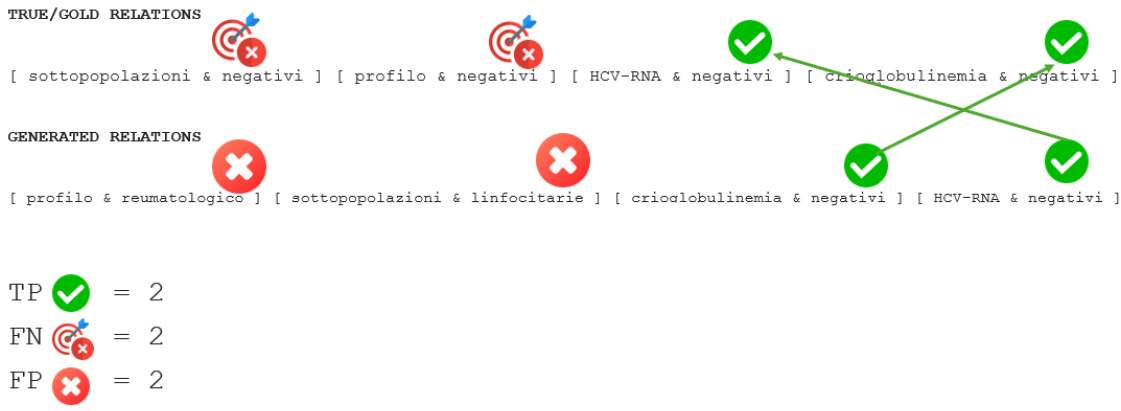

In [ ]:
#print some generated outputs
# max_length = max(len(outputs[key]) for key in outputs)
max_length = 10


for i in range(max_length):
    print(i)
    for key in outputs:

        if i < len(outputs[key]):

            print(f"{key}: {outputs[key][i]}")
    print('--------------------------------------------------')


0
Sentence:  A novembre del 2011 l’instaurarsi di uno stato di shock settico determina il decesso della paziente per arresto cardio-circolatorio. rdio-circolatorio.
Gold: []
Generated 0-Shot: shock settico, decesso, arresto cardio-circolatorio.
Generated 1-Shot: []
Generated Few-Shot: []
--------------------------------------------------
1
Sentence:  Le indagini radiologiche mostrano un peggioramento del quadro polmonare con aree di estesa consolidazione al lobo inferiore e medio di sinistra e superiore di destra con la necessità di ricorrere a NIV per ottenere saturazione di ossigeno adeguata
Gold: []
Generated 0-Shot: NIV, saturazione di ossigeno
Generated 1-Shot: []
Generated Few-Shot: []
--------------------------------------------------
2
Sentence:  Al triage vengono rilevati i seguenti parametri vitali: PA 140/70 mmHg, F.C. 100/min, ritmica, SpO2 98% in a.a., GCS 15/15
Gold: [ PA & 140/70 mmHg ] [ F.C & 100/min ] [ SpO2 & 98% ] [ GCS & 15/15 ]
Generated 0-Shot: PA 140/70 mmHg
Gen

In [ ]:
def count_matching_objects(s1, s2):


    objects_s1 = re.findall(r'\[\s*([\w<>/%.,;:-]+)\s*&\s*([\w\s<>/%.,;:-]+)\s*\]', s1)
    print(f"Gold (string form): {s1}")
    print(f"Gold (formatted form): {objects_s1}")
    objects_s2 = re.findall(r'\[\s*([\w<>/%.,;:-]+)\s*&\s*([\w\s<>/%.,;:-]+)\s*\]', s2)
    print(f"Generated (string form): {s2}")
    print(f"Generated (formatted form): {objects_s2}")



    tp = sum(1 for obj in objects_s1 if obj in objects_s2)

    num_objects_s1 = len(objects_s1)
    num_objects_s2 = len(objects_s2)


    fp = num_objects_s2 - tp
    fn = num_objects_s1 - tp

    print(f"True positive: {tp},False positive: {fp}, False negative: {fn}")
    print('----------------------------------------------')

    return tp, fp, fn

In [ ]:
cont_tp_0, cont_fp_0, cont_fn_0 = 0,0,0
cont_tp_1, cont_fp_1, cont_fn_1 = 0,0,0
cont_tp_few, cont_fp_few, cont_fn_few = 0,0,0

for k in range(len(df_test)):
  tp_0, fp_0, fn_0 = count_matching_objects(outputs['Gold'][k],outputs['Generated 0-Shot'][k])
  tp_1, fp_1, fn_1 = count_matching_objects(outputs['Gold'][k],outputs['Generated 1-Shot'][k])
  tp_few, fp_few, fn_few = count_matching_objects(outputs['Gold'][k],outputs['Generated Few-Shot'][k])

  cont_tp_0 += tp_0
  cont_fp_0 += fp_0
  cont_fn_0 += fn_0

  cont_tp_1 += tp_1
  cont_fp_1 += fp_1
  cont_fn_1 += fn_1

  cont_tp_few += tp_few
  cont_fp_few += fp_few
  cont_fn_few += fn_few


def f1_score(tp, fp, fn):
    if tp == 0:
      return 0,0,0
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    if precision + recall == 0:
        return 0,0,0

    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score, precision, recall


print("0-SHOT F1 Score, Precision, Recall:", f1_score(cont_tp_0, cont_fp_0, cont_fn_0))
print("1-SHOT F1 Score, Precision, Recall:", f1_score(cont_tp_1, cont_fp_1, cont_fn_1))
print("FEW-SHOT F1 Score, Precision, Recall:", f1_score(cont_tp_few, cont_fp_few, cont_fn_few))


Gold (string form): []
Gold (formatted form): []
Generated (string form): shock settico, decesso, arresto cardio-circolatorio.
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): NIV, saturazione di ossigeno
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (

The task is difficult and we are not using a large chatgpt4 and the prompt and the strategies are write in a very simple way...edit the prompt build a prompt based on instruction more structured explain using natural language in a way better i give you a sentence taken from a clinical report i want to perform clinical extraction the entity type that you can find is a value ect...change the order most similar example on the beginning you can invert this order play with most similar example or random example or i want to use 10 example from my model 5 example that contain e 5 that dont contain realation....

## Exercises

1. Edit the prompts in order to achieve better performance.

    You can edit the prompt words and/or the number of demonstrations (Few-Shots) and even the policy (for instance random) to retrieve a demonstration.

2. Try using a larger model such as GPT-4 or its variants, and evaluate its performance using precision, recall, and F1-score.

        



#Esercizio 1 v_1

Per comodità riportiamo tutti i blocchi di codice usati prima così da avere un confronto diretto tra le due tipologie di prompt.

Requirements, Dataset and Decoder Only Model Pre-Trained Base Llama 3, devono essere fatti runnare sopra. Su quelli non è stata fatta nessuna modifica.

Ridefiniamo invece le funzioni di zero_shot_prompt, one_shot, few_shot

CAMBIAMENTI:
Per migliorare le prestazioni si è intervenuti su tre aspetti principali:

Struttura del prompt:
È stato riscritto con un’intestazione più chiara e informativa, specificando esplicitamente il formato desiderato dell’output ([ Nome del parametro/test & Valore ]), e indicando chiaramente quando restituire una lista vuota. Questo aiuta il modello a non forzare relazioni inesistenti.
Selezione degli esempi few-shot:
Si è passati da un prompting statico (5 esempi con relazioni cliniche generiche) a un prompting dinamico e bilanciato:
3 esempi positivi selezionati automaticamente per similarità semantica con la frase in input.
2 esempi negativi realistici (frasi cliniche prive di relazioni) per istruire il modello su quando astenersi dal generare.

# Zero shot v_1

In [ ]:
def zero_shot_prompt_v1 (input_ctx):
  prompt = f"""Sei un assistente clinico. Ti viene fornita una frase tratta da un referto medico.
  Il tuo compito è estrarre tutte le relazioni tra **esami clinici, parametri vitali o misurazioni e i rispettivi valori osservati.
  Una relazione è una coppia del tipo: [ Nome del parametro/test & Valore ].
  Nelle frasi che riceverai in input il nome dell'esame clinico può essere abbreviato (es. "PA", "GCS") o esteso (es. "emoglobina", "diametro") e il valore può essere numerico (es. "100/min", "5 mm") o descrittivo (es. "nella norma").
  Se non ci sono relazioni nella frase, restituisci una lista vuota: `[]`.

  Ora tocca a te con questa frase in input:
  Frase: {input_ctx}
  Relazioni trovate dal modello:
  """
  return prompt

In [ ]:
sim_model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#embedding all sentences of the training
sentences = df_train['Sentences'].to_list()
embedded_sentences = sim_model.encode(sentences, convert_to_tensor=True)

# One shot v_1

In [ ]:
def one_shot_prompt_v1(input_ctx,X_train, y_train, embedded_sentences):

#Encode the input sentence
   embedded = sim_model.encode(input_ctx, convert_to_tensor=True)


#Compute cosine-similarities between test set input sentence and the sentences in the training set
   cosine_scores = util.cos_sim(embedded, embedded_sentences)


#extract the k (0) similar sentences
   array_values = np.array(cosine_scores[0].tolist())
   index = np.argsort(array_values)[-1:]

   prompt = f"""Sei un assistente clinico. Ti viene fornita una frase tratta da un referto medico.
   Il tuo compito è estrarre tutte le relazioni tra esami clinici, parametri vitali o misurazioni e i rispettivi valori osservati.
   Una relazione è una coppia del tipo: [ Nome del parametro/test & Valore ].
   Nelle frasi che riceverai in input il nome dell'esame clinico può essere abbreviato (es. "PA", "GCS") o esteso (es. "emoglobina", "diametro") e il valore può essere numerico (es. "100/min", "5 mm") o descrittivo (es. "nella norma").
   Se non ci sono relazioni nella frase, restituisci una lista vuota: `[]`.
   Ti fornisco anche un esempio corretto che puoi seguire questa è la frase {X_train.iloc[index[0]]}.
   Queste sono le relazioni corrette trovate nella frase {y_train.iloc[index[0]]}
   Ora tocca a te con questa frase in input:
   Frase: {input_ctx}
   Relazioni trovate dal modello:
   """
   return prompt

# Few Shot v_1

In [ ]:
def few_shot_prompt_v1(input_ctx, X_train, y_train, embedded_sentences):
    import numpy as np
    import random

    # Codifica della frase di input
    embedded = sim_model.encode(input_ctx, convert_to_tensor=True)

    # Calcolo delle similarità coseno tra la frase di input e le frasi del training set
    cosine_scores = util.cos_sim(embedded, embedded_sentences)

    # Estrazione degli indici delle 3 frasi più simili
    array_values = np.array(cosine_scores[0].tolist())
    index = np.argsort(array_values)[-3:][::-1]  # Ordine decrescente di similarità

    # Selezione casuale di 2 esempi senza relazioni
    empty_indices = [i for i, y in enumerate(y_train) if y.strip() == "[]" and len(X_train[i]) > 30]
    random.shuffle(empty_indices)
    empty_examples = empty_indices[:2]

    # Costruzione del prompt
    prompt = """Sei un assistente clinico. Ti viene fornita una frase tratta da un referto medico.
Il tuo compito è estrarre tutte le relazioni tra esami clinici, parametri vitali o misurazioni e i rispettivi valori osservati.
Una relazione è una coppia del tipo: [ Nome del parametro/test & Valore ].
Il nome dell'esame clinico può essere abbreviato (es. "PA", "GCS") o esteso (es. "emoglobina", "diametro").
Il valore può essere numerico (es. "100/min", "5 mm") o descrittivo (es. "nella norma").
Se non ci sono relazioni nella frase, restituisci una lista vuota: [].

Esempi con relazioni:
"""

    for i in index:
        prompt += f"\n---\nFrase di un referto medico: {X_train[i]}\nRelazioni trovate nella frase: {y_train[i]}"

    prompt += "\n\nEsempi senza relazioni:"

    for i in empty_examples:
        prompt += f"\n---\nFrase di un referto medico: {X_train[i]}\nRelazioni trovate nella frase: []"

    prompt += f"\n\nOra tocca a te con questa frase in input:\nFrase di un referto medico: {input_ctx}\nRelazioni trovate dal modello:"

    return prompt


In [ ]:
input_ids_lst_0 = []
input_ids_lst_1 = []
input_ids_lst_few = []

prompt_lst_0 = []
prompt_lst_1 = []
prompt_lst_few = []

for k in range(len(df_test)): #loop over test set

    #input sentence from test set
    input_ctxt = df_test['Sentences'].iloc[k]

    #building different prompts
    prompt_0 = zero_shot_prompt_v1(input_ctxt)
    prompt_1 = one_shot_prompt_v1(input_ctxt,df_train['Sentences'], df_train['Targets'], embedded_sentences)
    prompt_few = few_shot_prompt_v1(input_ctxt,df_train['Sentences'], df_train['Targets'], embedded_sentences)

    prompt_lst_0.append(prompt_0)
    prompt_lst_1.append(prompt_1)
    prompt_lst_few.append(prompt_few)

    #tokenize different prompts
    input_ids_0 = tokenizer(prompt_0, return_tensors="pt")
    input_ids_1 = tokenizer(prompt_1, return_tensors="pt")
    input_ids_few = tokenizer(prompt_few, return_tensors="pt")

    input_ids_lst_0.append(input_ids_0)
    input_ids_lst_1.append(input_ids_1)
    input_ids_lst_few.append(input_ids_few)

In [ ]:
print(prompt_lst_few[2])

Sei un assistente clinico. Ti viene fornita una frase tratta da un referto medico.
Il tuo compito è estrarre tutte le relazioni tra esami clinici, parametri vitali o misurazioni e i rispettivi valori osservati.
Una relazione è una coppia del tipo: [ Nome del parametro/test & Valore ].
Il nome dell'esame clinico può essere abbreviato (es. "PA", "GCS") o esteso (es. "emoglobina", "diametro").
Il valore può essere numerico (es. "100/min", "5 mm") o descrittivo (es. "nella norma").
Se non ci sono relazioni nella frase, restituisci una lista vuota: [].

Esempi con relazioni:

---
Frase di un referto medico:     I parametri vitali sono i seguenti: PA 148/86, FC 80 R, spO2 98% in aria ambiente, T 36.3°C
Relazioni trovate nella frase: [ PA & 148/86 ] [ FC & 80 R ] [ spO2 & 98% ] [ T & 36.3°C ]
---
Frase di un referto medico:  I parametri vitali evidenziavano PA 165/90 mmHg, F.C. 96 bpm ritmico
Relazioni trovate nella frase: [ PA & 165/90 mmHg ] [ F.C. & 96 bpm ritmico ]
---
Frase di un referto

È ncessario cambiare anche la lunghezza della sequenza che il modello può gestire ora che i prompt sono più lunghi

In [ ]:
max_seq_length = 1024+48 # Fix the sequence len that the model can handle , we have to fix a len the context of 128k tokens
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.
max_seq_length = 1900
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,

)

==((====))==  Unsloth 2025.5.9: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:
#it requires time

#init a dictionary to storing the generetade relations
outputs = {
    "Sentence": [],
    "Gold": [],
    "Generated 0-Shot": [],
    "Generated 1-Shot": [],
    "Generated Few-Shot": []
}

for k in range(len(df_test)): #loop over test set

    # 0-SHOT
    model_inputs_0 = input_ids_lst_0[k].input_ids.to(device) #The primary purpose is to ensure that the tensor input_ids is located on the same device as the model's parameters.
    generated_ids_0 = model.generate(model_inputs_0, do_sample=False, num_beams = 1, pad_token_id=tokenizer.eos_token_id, max_new_tokens = 64) #It generate text starting from the previous context according to some parameters.
    #batch decode generated ids_to response...
    response_0 = tokenizer.batch_decode(generated_ids_0, skip_special_tokens=True)[0] #Map the generated context and generated ids to words
    # Split by the last occurrence of "modello:" to get the generated text
    response_0 = response_0.split("modello:")[-1].strip()
    # Check if splitting by lines results in an empty list before accessing the first element
    response_0_lines = response_0.splitlines()
    if len(response_0_lines) > 0:
        response_0 = response_0_lines[0] #Split again to not consider other generated text
    else:
        response_0 = '[]' # Assign a default value if the list is empty

    # 1-SHOT
    model_inputs_1 = input_ids_lst_1[k].input_ids.to(device)
    generated_ids_1 = model.generate(model_inputs_1, do_sample=False, num_beams = 1, pad_token_id=tokenizer.eos_token_id, max_new_tokens = 64)
    response_1 = tokenizer.batch_decode(generated_ids_1, skip_special_tokens=True)[0]
    # Split by the last occurrence of "modello:" to get the generated text
    response_1 = response_1.split("modello:")[-1].strip()
    # Check if splitting by lines results in an empty list before accessing the first element
    response_1_lines = response_1.splitlines()
    if len(response_1_lines) > 0:
        response_1 = response_1_lines[0]
    else:
        response_1 = '[]' # Assign a default value if the list is empty


    # FEW-SHOT
    model_inputs_few = input_ids_lst_few[k].input_ids.to(device)
    generated_ids_few = model.generate(model_inputs_few, do_sample=False, num_beams = 1, pad_token_id=tokenizer.eos_token_id, max_new_tokens = 64)
    response_few = tokenizer.batch_decode(generated_ids_few, skip_special_tokens=True)[0]
    # Split by the last occurrence of "modello:" to get the generated text
    response_few = response_few.split("modello:")[-1].strip()
    # Check if splitting by lines results in an empty list before accessing the first element
    response_few_lines = response_few.splitlines()
    if len(response_few_lines) > 0:
        response_few = response_few_lines[0]
    else:
        response_few = '[]' # Assign a default value if the list is empty


    outputs["Sentence"].append(df_test['Sentences'].iloc[k])
    outputs["Gold"].append(df_test['Targets'].iloc[k])
    outputs["Generated 0-Shot"].append(response_0)
    outputs["Generated 1-Shot"].append(response_1)
    outputs["Generated Few-Shot"].append(response_few)

In [ ]:
#print some generated outputs
# max_length = max(len(outputs[key]) for key in outputs)
max_length = 10


for i in range(max_length):
    print(i)
    for key in outputs:

        if i < len(outputs[key]):

            print(f"{key}: {outputs[key][i]}")
    print('--------------------------------------------------')

0
Sentence:  A novembre del 2011 l’instaurarsi di uno stato di shock settico determina il decesso della paziente per arresto cardio-circolatorio. rdio-circolatorio.
Gold: []
Generated 0-Shot: - [PA & 100/min]
Generated 1-Shot: []
Generated Few-Shot: []
--------------------------------------------------
1
Sentence:  Le indagini radiologiche mostrano un peggioramento del quadro polmonare con aree di estesa consolidazione al lobo inferiore e medio di sinistra e superiore di destra con la necessità di ricorrere a NIV per ottenere saturazione di ossigeno adeguata
Gold: []
Generated 0-Shot: - [NIV & 5 mm]
Generated 1-Shot: [ "aree", "di estesa consolidazione" ]
Generated Few-Shot: []
--------------------------------------------------
2
Sentence:  Al triage vengono rilevati i seguenti parametri vitali: PA 140/70 mmHg, F.C. 100/min, ritmica, SpO2 98% in a.a., GCS 15/15
Gold: [ PA & 140/70 mmHg ] [ F.C & 100/min ] [ SpO2 & 98% ] [ GCS & 15/15 ]
Generated 0-Shot: - PA 140/70
Generated 1-Shot: [ 

In [ ]:
cont_tp_0, cont_fp_0, cont_fn_0 = 0,0,0
cont_tp_1, cont_fp_1, cont_fn_1 = 0,0,0
cont_tp_few, cont_fp_few, cont_fn_few = 0,0,0

for k in range(len(df_test)):
  tp_0, fp_0, fn_0 = count_matching_objects(outputs['Gold'][k],outputs['Generated 0-Shot'][k])
  tp_1, fp_1, fn_1 = count_matching_objects(outputs['Gold'][k],outputs['Generated 1-Shot'][k])
  tp_few, fp_few, fn_few = count_matching_objects(outputs['Gold'][k],outputs['Generated Few-Shot'][k])

  cont_tp_0 += tp_0
  cont_fp_0 += fp_0
  cont_fn_0 += fn_0

  cont_tp_1 += tp_1
  cont_fp_1 += fp_1
  cont_fn_1 += fn_1

  cont_tp_few += tp_few
  cont_fp_few += fp_few
  cont_fn_few += fn_few


def f1_score(tp, fp, fn):
    if tp == 0:
      return 0,0,0
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    if precision + recall == 0:
        return 0,0,0

    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score, precision, recall


print("0-SHOT F1 Score, Precision, Recall:", f1_score(cont_tp_0, cont_fp_0, cont_fn_0))
print("1-SHOT F1 Score, Precision, Recall:", f1_score(cont_tp_1, cont_fp_1, cont_fn_1))
print("FEW-SHOT F1 Score, Precision, Recall:", f1_score(cont_tp_few, cont_fp_few, cont_fn_few))

Gold (string form): []
Gold (formatted form): []
Generated (string form): - [PA & 100/min]
Generated (formatted form): [('PA', '100/min')]
True positive: 0,False positive: 1, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): - [NIV & 5 mm]
Generated (formatted form): [('NIV', '5 mm')]
True positive: 0,False positive: 1, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): [ "aree", "di estesa consolidazi

# RISULTATI v_1

L’analisi dei risultati mette in evidenza come il nuovo prompt few-shot abbia migliorato la sensibilità del modello nel riconoscere relazioni cliniche, soprattutto nei casi in cui i valori associati ai test non sono numerici ma descrittivi (es. “positiva”, “nella norma”, “stabilizzata”). Questo tipo di formulazioni, frequentemente presenti nei referti medici reali, tendevano a essere ignorate nella configurazione iniziale.

In particolare, si osserva che:

Il modello capta molto bene relazioni esplicite tra parametri vitali e valori numerici (es. PA & 140/70 mmHg, GCS & 15/15).
Questo avviene con elevata accuratezza sia in modalità 1-shot che few-shot, segno che gli esempi inseriti forniscono un pattern chiaro e ripetibile.
Con il nuovo prompt, il modello riesce a intercettare meglio relazioni debolmente espresse (es. EBV & positiva, emoglobina & nella norma), che prima venivano sistematicamente perse.
Ciò è indicativo dell’efficacia dell’inclusione di esempi descrittivi nel few-shot.
Persistono invece alcune difficoltà nei contesti clinici generici o poco strutturati, come frasi che descrivono condizioni generali del paziente, terapie o follow-up (“la paziente è dimessa con controllo a 40 gg”).
In questi casi, il modello tende ancora a generare false relazioni, specialmente quando incontra coppie di parole plausibili ma non informative (es. controllo & 40 gg, peso & 17 Kg anche se non erano presenti nella frase).
Questo indica che la precisione è ancora penalizzata da un'eccessiva fiducia del modello, che cerca di "riempire" anche quando non è necessario.
Le performance migliori si ottengono quando la frase è ben strutturata, clinicamente densa e simile agli esempi few-shot, confermando che il modello è molto sensibile alla qualità e coerenza del contesto fornito nel prompt.
In sintesi, il nuovo prompting migliora significativamente la recall e la comprensione di relazioni descrittive, ma introduce nuove sfide sul piano della precisione, specialmente in frasi ambigue o fuori dominio rispetto agli esempi forniti. Questo suggerisce come futuri miglioramenti debbano puntare su:

1. affinamento della selezione degli esempi few-shot (es. evitare eccessiva omogeneità).
2. introduzione controllata di esempi ambigui negativi o borderline.

# ESERCIZIO 2



Nell’ambito dell’esercizio 2 è stato utilizzato il modello Mistral-7B-Instruct-v0.2, un modello linguistico open-source sviluppato da Mistral AI e disponibile pubblicamente su Hugging Face (https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2). Si tratta di un modello autoregressivo di tipo decoder-only con 7 miliardi di parametri, istruito con tecniche di instruction fine-tuning per seguire comandi e completare prompt strutturati in linguaggio naturale.

La variante "Instruct" è progettata specificamente per migliorare la capacità del modello di comprendere ed eseguire istruzioni complesse, rendendolo adatto a task come l’estrazione di relazioni cliniche da referti medici, anche in setting few-shot. Il modello supporta una finestra di contesto di 8.192 token, il che consente di includere più esempi nel prompt, aumentando le capacità di generalizzazione rispetto a configurazioni zero- o one-shot.

Nell'esperimento, Mistral è stato utilizzato in locale tramite la libreria transformers di Hugging Face, senza necessità di accedere a servizi cloud o API a pagamento.

In [ ]:
!pip install transformers accelerate bitsandbytes


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from huggingface_hub import notebook_login

model_name = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)

# Init a dictionary to storing the generated relations for the new model
outputs_mistral = {
    "Sentence": [],
    "Gold": [],
    "Generated 0-Shot": [],
    "Generated 1-Shot": [],
    "Generated Few-Shot": []
}

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Loop over the test set to generate predictions for each prompt type
for k in range(len(df_test)):
    # 0-SHOT
    # using the v1 prompts defined previously
    prompt_0 = zero_shot_prompt_v1(df_test['Sentences'].iloc[k])
    model_inputs_0 = tokenizer(prompt_0, return_tensors="pt").to(device)
    # Pass the input_ids tensor directly to the generate function
    generated_ids_0 = model.generate(model_inputs_0['input_ids'], do_sample=False, num_beams=1, pad_token_id=tokenizer.eos_token_id, max_new_tokens=64)
    response_0 = tokenizer.decode(generated_ids_0[0], skip_special_tokens=True)
    response_0 = response_0.split("modello:")[-1].strip()
    response_0_lines = response_0.splitlines()
    if len(response_0_lines) > 0:
        response_0 = response_0_lines[0]
    else:
        response_0 = '[]'

    # 1-SHOT
    prompt_1 = one_shot_prompt_v1(df_test['Sentences'].iloc[k], df_train['Sentences'], df_train['Targets'], embedded_sentences)
    model_inputs_1 = tokenizer(prompt_1, return_tensors="pt").to(device)
    # Pass the input_ids tensor directly to the generate function
    generated_ids_1 = model.generate(model_inputs_1['input_ids'], do_sample=False, num_beams=1, pad_token_id=tokenizer.eos_token_id, max_new_tokens=64)
    response_1 = tokenizer.decode(generated_ids_1[0], skip_special_tokens=True)
    response_1 = response_1.split("modello:")[-1].strip()
    response_1_lines = response_1.splitlines()
    if len(response_1_lines) > 0:
        response_1 = response_1_lines[0]
    else:
        response_1 = '[]'

    # FEW-SHOT
    prompt_few = few_shot_prompt_v1(df_test['Sentences'].iloc[k], df_train['Sentences'], df_train['Targets'], embedded_sentences)
    model_inputs_few = tokenizer(prompt_few, return_tensors="pt").to(device)
    # Pass the input_ids tensor directly to the generate function
    generated_ids_few = model.generate(model_inputs_few['input_ids'], do_sample=False, num_beams=1, pad_token_id=tokenizer.eos_token_id, max_new_tokens=64)
    response_few = tokenizer.decode(generated_ids_few[0], skip_special_tokens=True)
    response_few = response_few.split("modello:")[-1].strip()
    response_few_lines = response_few.splitlines()
    if len(response_few_lines) > 0:
        response_few = response_few_lines[0]
    else:
        response_few = '[]'


    outputs_mistral["Sentence"].append(df_test['Sentences'].iloc[k])
    outputs_mistral["Gold"].append(df_test['Targets'].iloc[k])
    outputs_mistral["Generated 0-Shot"].append(response_0)
    outputs_mistral["Generated 1-Shot"].append(response_1)
    outputs_mistral["Generated Few-Shot"].append(response_few)


In [ ]:
# Print some generated outputs for Mistral
max_length = 10
for i in range(max_length):
    print(f"Example {i}")
    for key in outputs_mistral:
        if i < len(outputs_mistral[key]):
            print(f"{key}: {outputs_mistral[key][i]}")
    print('--------------------------------------------------')

Example 0
Sentence:  A novembre del 2011 l’instaurarsi di uno stato di shock settico determina il decesso della paziente per arresto cardio-circolatorio. rdio-circolatorio.
Gold: []
Generated 0-Shot: []
Generated 1-Shot: []
Generated Few-Shot: []
--------------------------------------------------
Example 1
Sentence:  Le indagini radiologiche mostrano un peggioramento del quadro polmonare con aree di estesa consolidazione al lobo inferiore e medio di sinistra e superiore di destra con la necessità di ricorrere a NIV per ottenere saturazione di ossigeno adeguata
Gold: []
Generated 0-Shot: 1. Quadro polmonare: [stato polmonare]
Generated 1-Shot: [
Generated Few-Shot: [ "consolidazione polmonare", "aree di estesa" ],
--------------------------------------------------
Example 2
Sentence:  Al triage vengono rilevati i seguenti parametri vitali: PA 140/70 mmHg, F.C. 100/min, ritmica, SpO2 98% in a.a., GCS 15/15
Gold: [ PA & 140/70 mmHg ] [ F.C & 100/min ] [ SpO2 & 98% ] [ GCS & 15/15 ]
Genera

In [ ]:
def f1_score(tp, fp, fn):
    # Avoid division by zero
    if tp + fp == 0:
        precision = 0.0
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 0.0
    else:
        recall = tp / (tp + fn)

    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return f1, precision, recall

In [ ]:
# Calculate TP, FP, FN for each prompt type using the count_matching_objects function
cont_tp_0_mistral, cont_fp_0_mistral, cont_fn_0_mistral = 0, 0, 0
cont_tp_1_mistral, cont_fp_1_mistral, cont_fn_1_mistral = 0, 0, 0
cont_tp_few_mistral, cont_fp_few_mistral, cont_fn_few_mistral = 0, 0, 0

for k in range(len(df_test)):
    tp_0, fp_0, fn_0 = count_matching_objects(outputs_mistral['Gold'][k], outputs_mistral['Generated 0-Shot'][k])
    tp_1, fp_1, fn_1 = count_matching_objects(outputs_mistral['Gold'][k], outputs_mistral['Generated 1-Shot'][k])
    tp_few, fp_few, fn_few = count_matching_objects(outputs_mistral['Gold'][k], outputs_mistral['Generated Few-Shot'][k])

    cont_tp_0_mistral += tp_0
    cont_fp_0_mistral += fp_0
    cont_fn_0_mistral += fn_0

    cont_tp_1_mistral += tp_1
    cont_fp_1_mistral += fp_1
    cont_fn_1_mistral += fn_1

    cont_tp_few_mistral += tp_few
    cont_fp_few_mistral += fp_few
    cont_fn_few_mistral += fn_few

# Evaluate and print performance metrics for Mistral
f1_0_mistral, precision_0_mistral, recall_0_mistral = f1_score(cont_tp_0_mistral, cont_fp_0_mistral, cont_fn_0_mistral)
f1_1_mistral, precision_1_mistral, recall_1_mistral = f1_score(cont_tp_1_mistral, cont_fp_1_mistral, cont_fn_1_mistral)
f1_few_mistral, precision_few_mistral, recall_few_mistral = f1_score(cont_tp_few_mistral, cont_fp_few_mistral, cont_fn_few_mistral)

print("\nMistral 7B Instruct v0.2 Performance:")
print("0-SHOT F1 Score, Precision, Recall:", (f1_0_mistral, precision_0_mistral, recall_0_mistral))
print("1-SHOT F1 Score, Precision, Recall:", (f1_1_mistral, precision_1_mistral, recall_1_mistral))
print("FEW-SHOT F1 Score, Precision, Recall:", (f1_few_mistral, precision_few_mistral, recall_few_mistral))



Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): []
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): 1. Quadro polmonare: [stato polmonare]
Generated (formatted form): []
True positive: 0,False positive: 0, False negative: 0
----------------------------------------------
Gold (string form): []
Gold (formatted form): []
Generated (string form): [
Generated (formatted form): []
True positive: 0,Fals

Questo risultato suggerisce che LLaMA 3.1 8B è più capace di generalizzare il pattern estrattivo a partire dagli esempi forniti nel prompt, riuscendo a individuare un numero maggiore di relazioni corrette anche in frasi complesse o poco standardizzate. Al contrario, Mistral 7B mostra un comportamento più conservativo: tende a produrre meno output, ma con maggiore precisione, evidenziando una certa cautela nel classificare come valide relazioni non esplicitamente simili a quelle già viste. In scenari dove il recall è critico — come nell’analisi clinica — la maggiore copertura garantita da LLaMA può risultare più utile, anche al costo di qualche falso positivo in più.